## Intermediate Machine Learning: Assignment 1

**Deadline**

Assignment 1 is due Thursday, September 25 11:59 pm. Late work will not be accepted as per the course policies (see the syllabus on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Acknowledge any use of an AI system such as ChatGPT or Copilot.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Lasso
 * Bias-variance decomposition
 * Mercer kernels
 * LOOCV for kernel smoothing and ridge regression

This assignment will also help to solidify your Python and Jupyter notebook skills.


### Problem 1: Roping variables with the lasso (15 points)

In this exercise, we'll employ the lasso regression technique to identify key predictor variables from the diabetes dataset. This dataset is used in the study by Efron, Hastie, Johnstone, and Tibshirani (2004, *Annals of Statistics*, "Least Angle Regression"). The primary goal is to predict a quantitative measure of diabetes progression one year after baseline, based on ten standardized physiological and biochemical measurements.


The *Diabetes* dataset in the `sklearn.datasets` package is a classic benchmark for regression. It contains 442 samples with 10 features that have been centered to mean zero but not scaled to unit variance. The predictors include age, sex, body mass index (BMI), blood pressure (BP), and six blood serum measures (s1–s6: cholesterol, LDL, HDL, cholesterol/HDL ratio, triglycerides, and blood sugar). The target is a quantitative measure of diabetes progression one year after baseline. You can find details at https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset.

**Your tasks are as follows**:

1. **Plotting Lasso Paths**: Generate a visualization of the lasso regularization paths.
2. **Identifying Key Predictors**: Determine which coefficients of \( \beta \) are non-zero.
3. **Estimating Coefficients**: Provide the best estimate for these non-zero coefficients.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
%matplotlib inline

Just run the next cell to read in the data.

In [2]:
# Insert this code just above problem 1.1
X, y = load_diabetes(return_X_y=True)
n, p = X.shape
print("Number of rows: {}".format(n))
print("Number of columns: {}".format(p))
# Note that X, y = load_diabetes(return_X_y=True) has already been standardized.
# You can explore the raw data with the following code:
X_raw, y_raw = load_diabetes(return_X_y=True, scaled=False)
print(np.allclose(y, y_raw))
print(np.allclose(X/np.std(X,axis=0), (X_raw - np.mean(X_raw, axis=0)) / np.std(X_raw, axis=0)))
# The above two print statements should both return True.

Number of rows: 442
Number of columns: 10
True
True


### 1.1: Lasso regularization paths

Run the lasso and plot the regularization paths. You can use the `Lasso` class from the `sklearn.linear_model` package. Plot the parameter paths with the regularization level $\lambda$ (`alpha` in the code) on the log-scale, as done in the lasso demo code from class. (As always, be sure to label your axes.)

Show two plots, one where you run the lasso on the variables as given in the dataset, another where you standardize the variables to have mean zero and standard deviation one. Describe the differences in the regularization paths, and explain those differences.

When the predictors are standardized, what order do they appear in the lasso fits? That is, as $\lambda$ decreases from infinity to zero, what is the sequence of variables that enter the model with nonzero coefficients? Explain why this ordering may (or may not) make sense.


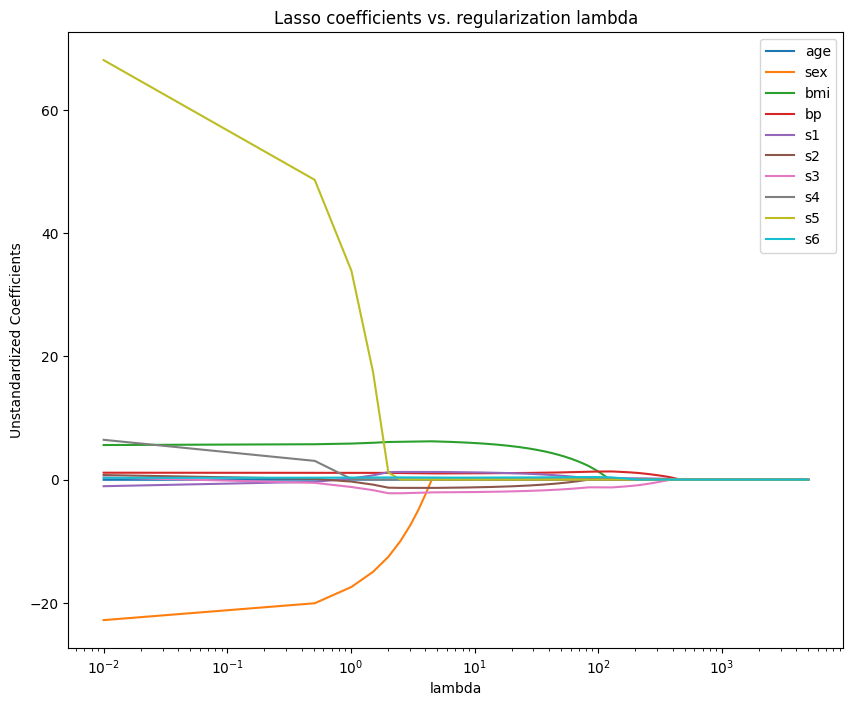

In [3]:
# run lasso on the unstandardized dataset
alphau = np.linspace(0.01,5000,10000)
lasso_un = Lasso()
# to store the estimated coefficients
coefs_un = np.zeros((len(alphau), X_raw.shape[1]))

# try different regularization levels
for i, a in enumerate(alphau):
  lasso_un.set_params(alpha=a)
  lasso_un.fit(X_raw, y_raw)
  coefs_un[i, :] = lasso_un.coef_

plt.figure(figsize=(10,8))
ax = plt.gca()

# add labels to the features
features = load_diabetes().feature_names
for idx, name in enumerate(features):
  ax.plot(alphau, coefs_un[:, idx], label=name)

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Unstandardized Coefficients')
plt.legend(loc='upper right')
plt.title('Lasso coefficients vs. regularization lambda');


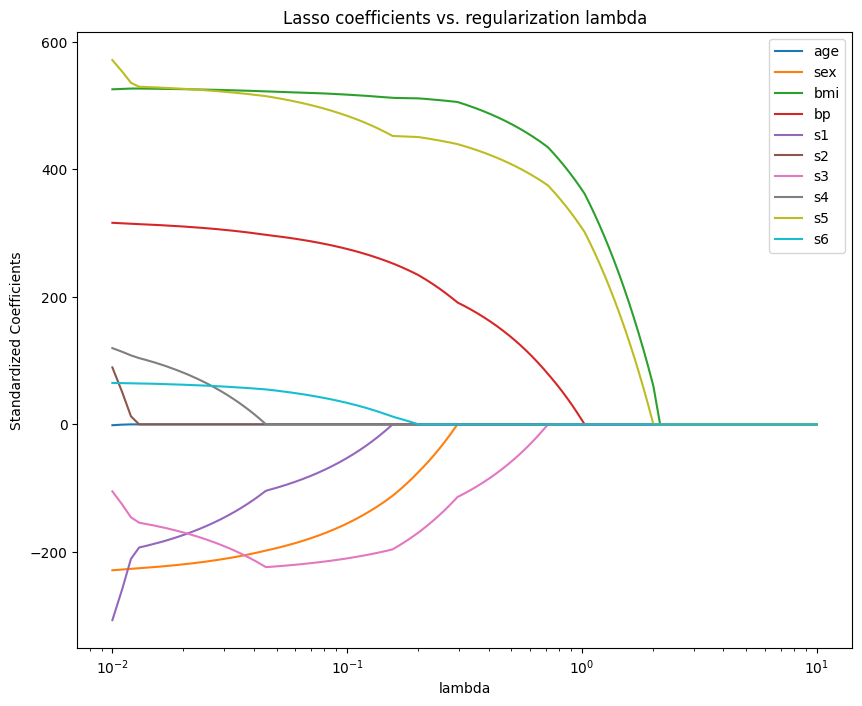

In [4]:
# run lasso on the unstandardized dataset
alphas = np.linspace(0.01,10,10000)
lasso = Lasso()
# to store the estimated coefficients
coefs = np.zeros((len(alphas), X_raw.shape[1]))

# try different regularization levels
for i, a in enumerate(alphas):
  lasso.set_params(alpha=a)
  lasso.fit(X, y)
  coefs[i, :] = lasso.coef_

plt.figure(figsize=(10,8))
ax = plt.gca()

# add labels to the features
features = load_diabetes().feature_names
for idx, name in enumerate(features):
  ax.plot(alphas, coefs[:, idx], label=name)

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='upper right')
plt.title('Lasso coefficients vs. regularization lambda');

In [5]:
# compute the variance for unstandardized data
variances = np.var(X_raw, axis=0, ddof=1)

for f, v in zip(features, variances):
    print(f"{f}: {v}")

age: 171.84661043904728
sex: 0.24956136300674067
bmi: 19.51979812437796
bp: 191.30440103836415
s1: 1197.717240742452
s2: 924.9554940437704
s3: 167.29358538287124
s4: 1.6652609356563135
s5: 0.2728918982944974
s6: 132.16571243882152


In [6]:
# compute the corresponding correlation between features in X and y
cors = np.corrcoef(X, y, rowvar=False)[:-1, -1]

for f, v in zip(features, cors):
    print(f"{f}: {v}")

age: 0.1878887507189199
sex: 0.04306199845160531
bmi: 0.5864501344746885
bp: 0.4414817585625709
s1: 0.21202248101455073
s2: 0.17405358696874265
s3: -0.3947892506709185
s4: 0.43045288474477333
s5: 0.5658825924427437
s6: 0.38248348424858103


Comparing the two regularization paths, I found
1. The unstandardized case estimated parameters are generally smaller than the standardized case. It also has a lot of features with the estimated parameter close but not equal to zero all the way along the regularization path while the standardized case does not have.\
This makes sense, as the estimation of $\beta_j$ means how much change of y would be made by a unit change of $X_j$. This means the fluctuation of y is related to the fluctuation of $X_j$ with the size of $\beta_j$. For the unstandardized case, this trend is scaled by the variance, meaning for $X_j$ with large variance, we need y with an even larger variance to achieve a relatively large $\beta_j$, and vise versa for $X_j$ with small variance.\
Therefore, $\beta_j$ tends to remain at a small value for $X_j$ with large variance and be larger for $X_j$ with small variance. In our dataset, the order of values of $\beta_j$ coincides with the order of the variance of $X_j$. I did the variance computation in the previous cell.\
However, for the standardized case, we have removed the scale of fluctuation, so that only the trend matters the values of $\beta_j$. In this case, $\beta_j$ is exactly how the change of $X_j$ will lead to the change of y.

2. The order of the features for the unstandardized case is different from the standardized case. As I mentioned earlier, the parameter estimation of the unstandardized case is influenced by both the trend-relation between $X_j$ and y and the variance of $X_j$. Therefore, the order of the unstandardized case does not reflect the exact order of features.

3. The shrinkage of the unstandardized case is slower than the standardized case. This is due to the general smaller scale of $\beta_j$ for the unstandardized case than the standardized case. It will lead a smaller scale for the penalization term, leading a slower decrease of the size of coefficient.

The order of predictors:
"bmi", "s5", "bp", "s3", "sex", "s6", "s1", "s4", "s2" and "age".

The order of predictors provides a sense of the order of importance it is for the prediction of y. For the exact importance of the feature to y, I computed the correlation between y and each feature, shown in the previous cell. The absolute values do not rigriously decrease as the order of predictors.

This may because within the predictors, some of them are highly correlated, or have collinearity. Therefore, after introducing one of such parameters, it is not necessary to immediately introduce the other, as it will have little to do with the prediction of y.

However, the most relevant predictor is always the first to be introduced. Here it is "bmi". Also, I think the order of preditors makes a lot of sense as an indication of the order of the power for predicting y in this certain set of features.

### 1.2: Select, estimate, and predict

The true model is linear, and only a subset $S \subset \{0,1,\ldots, 9\}$ of the 10 variables have non-zero coefficients $\beta_j$. In this problem you should make three estimates:

1. An estimate $\hat S$ of $S$
2. An estimate $\hat \beta_j$ for each $j\in \hat S$
3. An estimate of the predictive risk ${\mathbb E}(Y - X\hat\beta)^2$


We are not specifying how you should construct these estimates. You should use your judgement, taste, and
the tools provided from class. However, you must clearly explain and justify whatever approach that you use.


Here, I did step by step as the algorithm stated in the lecture notes.

After proposing the values of lambdas I want to try, I used Lasso function to estimate $\hat{\beta}$ and then extracted $\hat{S}$ under full dataset.

Then I performed LOOCV to calculate $\hat{R}$ for each lambda.

The lambda with the smallest risk indicates an optimal, and provides the most relevant features selected. I keep the $\hat{S}$ and perform OLS on this selected dataset for the final estimation of $\hat{\beta}$ and predictive risk.

In [7]:
# load LOOCV package
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

coefs = []
# lambda set we want to try
lambdas = np.logspace(-2, 1, 100)
S_lambda = []
risk = np.zeros(len(lambdas))
lasso_opt = Lasso()

for i, l in enumerate(lambdas):
  # fit the model
  lasso_opt.set_params(alpha=l)
  coefs_opt = lasso_opt.fit(X, y).coef_
  # find S for the corresponding lambda
  S = np.where(coefs_opt != 0)[0]
  S_lambda.append(S)

  # LOOCV
  scores = cross_val_score(
      lasso_opt, X, y,
      # MSE when one entry is left out
      scoring=make_scorer(mean_squared_error),
      cv=LeaveOneOut()
  )

  # As scores returns an array of scores, take the mean to get the risk
  risk[i] = scores.mean()

In [8]:
# compute the lambda and S with the smallest risk
i_hat = np.argmin(risk)
lambdahat = lambdas[i_hat]
Shat = S_lambda[i_hat]

# fit an OLS on the selected dataset
from sklearn.linear_model import LinearRegression
X_sel = X[:, Shat]
ols = LinearRegression()
ols.fit(X_sel, y)
betahat = ols.coef_
y_pred = ols.predict(X_sel)
mse = mean_squared_error(y, y_pred)

print(f"The estimation of S hat is feature {Shat}, meaning the features {[features[i] for i in Shat]} are selected.")
print(f"The estimation of beta hat is {betahat}.")
print(f"The estimation of the predicted risk is {mse}")


The estimation of S hat is [1 2 3 4 6 8 9], meaning the features ['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6'] are selected.
The estimation of beta hat is [-232.74310799  526.43955076  315.35955074 -146.34649016 -235.29673293
  540.18423362   72.18267215].
The estimation of the predicted risk is 2878.462102691307


### Problem 2: Risky business (10 points)

In class [(and in these notes)](https://github.com/YData123/sds365-fa22/raw/main/notes/kernel-bias-variance.pdf) we sketched a proof that, when the regression function has two bounded derivatives,
 the bias and variance for kernel smoothing scale as

$$ \mbox{bias}^2 = O\left(h^4\right)$$
$$ \mbox{var} = O\left(\frac{1}{nh^p}\right).$$

Here $h$ is the bandwidth parameter, $n$ is the sample size, and $p$ is the number of predictor variables. These expressions are asymptotic, meaning that they apply as $n$ gets large and $h$ gets small.  In this problem your job is to reason about the implications of this bias-variance decomposition for prediction.

*Note:* For this problem, you may either enter your answers in Markdown using $\rm\LaTeX$, or you write them on paper and scan to insert as an image in the notebook; whichever you prefer.


### 2.1 Selecting the optimal bandwidth

Suppose that the bias and variance are such that

$$ \mbox{bias}^2(\hat m(x))  \leq c_1 h^4 $$
$$ \mbox{var}(\hat m(x)) \leq c_2 \frac{1}{nh^p}.$$

for two constants $c_1$ and $c_2$. Using these expressions and a little calculus, determine the optimal bandwidth $h$ to minimize the risk function

$$R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2.$$

Your answer should involve the constants $c_1, c_2$, and $n$ and $p$. Give a bound on the resulting risk using this bandwidth.

![2.1](/home/2.1.JPG)


### 2.2 Bandwith selection without tears

Now, going back to the expressions $\mbox{bias}^2 = O\left(h^4\right)$ and $ \mbox{var} = O\left(\displaystyle\frac{1}{nh^p}\right)$, explain why the scaling of the optimal bandwidth (as a function of $n$ and $p$), must satisfy
$\mbox{bias}^2  \approx \mbox{var}$; that is, they must be of the same order as $h\to 0$. Then, without using any calculus, use this argument to determine the optimal scaling of the bandwidth and the fastest rate at which the
risk $R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2$ can approach zero as the sample size increases.


### 2.3 The cursed COD

Using the risk bound you derive above, make a plot that demonstrates the curse of dimensionality by plotting the sample size required to achieve a given level of risk. Specifically, let the target risk $R$ vary between 0.1 and 0.5, and let the dimension $p$ vary between 1 and 20, and plot the sample size required to achieve that risk. Give a single plot that shows the collection of curves for each dimension.




As shown in 2.2, $ \mbox{R}(h) = O\left(\displaystyle n^{-\frac{4}{p+4}}\right)$.

As it is an order, we have $ \mbox{R}(h) \geq \displaystyle n^{-\frac{4}{p+4}}$, so $ n \geq \displaystyle \mbox{R}(h)^{-\frac{p+4}{4}}$. This provides the level of the sample size we need to achieve the risk.

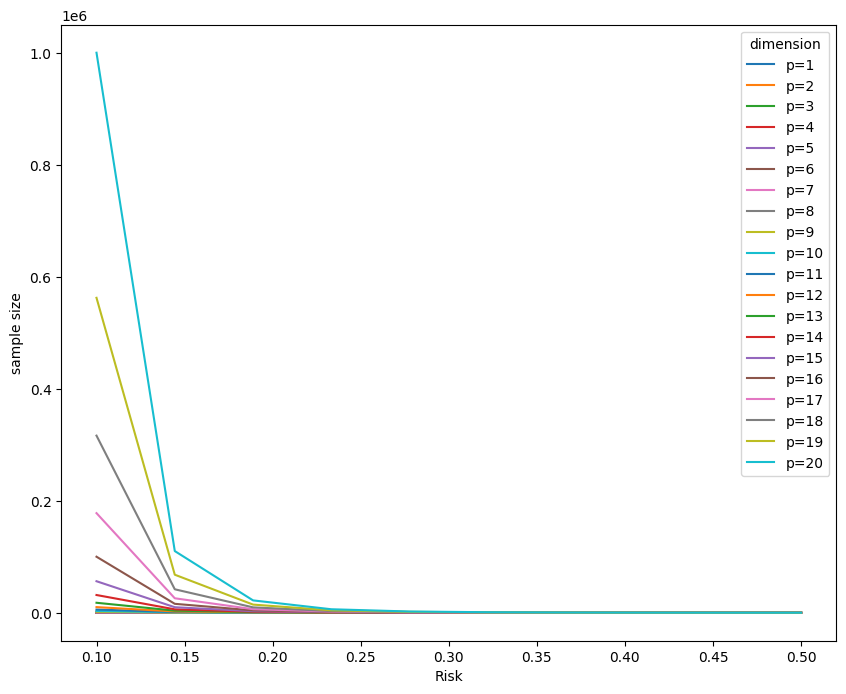

In [9]:
# set the values for target risk R and dimention p
R_levels = np.linspace(0.1, 0.5, 10)
dim = np.array(range(1, 21))

# calculate the sample size
def sample_size(R, p):
  power = -(4+p) / 4
  return R ** power

# plot for each size of dimension
plt.figure(figsize=(10,8))
ax = plt.gca()

for p in dim:
  # for each size of dimension, calculate the level of sample size
  # for different levels of risk
  n_vals = sample_size(R_levels, p)
  ax.plot(R_levels, n_vals, label=f"p={p}")

plt.axis('tight')
plt.xlabel('Risk')
plt.ylabel('sample size')
ax.legend(title='dimension')
plt.title('');

What we plot is the sample size needed to achieve the same risk level for different values of dimension. We can see from here that the required level of sample size gets larger under the same risk level as the dimension increases. This shows the curse of dimensionality. Meanwhile, the same sample size has a higher risk level under larger dimension.

### Problem 3: A kernel of truth (15 points)

For problem you will implement nonparametric regression using Mercer kernels and penalization, in 1-dimension. This can be compared to regression using smoothing kernels.

As discussed in lecture, nonparametric regression with Mercer kernels is based on the infinite dimensional ridge regression

$$ \hat m = \mbox{argmin} \| Y - m \|^2 + \lambda \|m\|_K^2$$

By the representer theorem, this is equivalent to setting $\hat m(x) = \sum_{i=1}^n \hat \alpha_i K(X_i, x)$ and
using the finite dimensional optimization

$$ \hat \alpha = \mbox{argmin} \| Y - {\mathbb K} \alpha \|^2 + \lambda \alpha^T {\mathbb K} \alpha$$

###  3.1 Solve

Derive a closed-form expression for the minimizer $\hat\alpha$. Show all of the steps in your derivation,
and justify each step. (As above, you may either enter your answers in Markdown using $\rm\LaTeX$, or insert an image of your handwritten solution.)


###  3.2 Implement

Next you will use your solution above and implement Mercer kernel regression. We give some starter code.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep

The following cell defines some "helper functions" for this exercise. You don't need to change any of this code.
(If you do want to make changes, just describe what you did and why.)

In [11]:
def plot_estimate(x, f, fhat, X, y, sigma, lmbda, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.plot(x, f, color='red', linewidth=2, label='true function')
    plt.plot(x, fhat, color='blue', linewidth=2, label='estimated function')
    plt.scatter(X, y, color='black', alpha=.5, label='random sample')
    plt.ylim(np.min(f)-4*sigma, np.max(f)+4*sigma)
    plt.legend(loc='upper left')
    plt.title('lambda: %.3g' % lmbda)
    plt.xlabel('x')
    plt.ylabel('estimated m(x)')
    plt.show()
    sleep(sleeptime)

def true_fn(x):
    return 3*x**2

def run_simulation(kernel, lmbdas, show_bias_variance=True):
    min_x, max_x = -1, 1
    x = np.linspace(min_x, max_x, 100)
    f = true_fn(x)
    sigma = .25
    estimates = []
    trials = 500

    for lmbda in lmbdas:
        estimates_lambda = []
        for i in np.arange(trials):
            X = np.sort(np.random.uniform(low=min_x, high=max_x, size=50))
            fX = true_fn(X)
            y = fX + sigma*np.random.normal(size=len(X))
            fhat = mercer_kernel_regress(kernel, X, y, x, lmbda=lmbda)
            if i % 50 == 0:
                plot_estimate(x, f, fhat, X, y, sigma, lmbda)
            estimates_lambda.append(fhat)
        estimates.append(estimates_lambda)

    if show_bias_variance == False:
        return

    fhat = np.array(estimates)
    sq_bias = np.zeros(len(lmbdas))
    variance = np.zeros(len(lmbdas))

    for i in np.arange(len(lmbdas)):
        sq_bias[i] = np.mean((np.mean(fhat[i], axis=0) - f)**2)
        variance[i] = np.mean(np.var(fhat[i], axis=0))


    plt.figure(figsize=(10,6))
    plt.plot(lmbdas, sq_bias, label='squared bias', linewidth=2)
    plt.plot(lmbdas, variance, label='variance', linewidth=2)
    plt.plot(lmbdas, sq_bias + variance, label='risk')
    plt.legend()
    plt.show()

    # Add code to print the optimal lambda
    risk = sq_bias + variance
    lambda_hat = lmbdas[np.argmin(risk)]
    print("Optimal lambda =", lambda_hat)


Your job is to implement Mercer kernel regression and run it on two
different kernel functions. The two kernels could simply be the Gaussian kernel
with two different bandwidths, or you might experiment with other kernels.

The function `mercer_kernel_regress` takes a kernel, training data `X` and `y`, an array of values `x` to evaluate the function on, and a regularization parameter. You'll use your derivation above to
determine the coefficients $\alpha$. For some clues and suggestions on how to do the
implementation, see our demo code for smoothing kernels. You need to do something very similar.


In [12]:
def mercer_kernel_regress(kernel, X, y, x, lmbda):

  """
  Here we do the similar as what we did in our class demo code for the random mercer kernel function.
  Instead of randomly assigning a value to alpha, we apply the result in 3.1 for optimization.
  """

  # calculate the value of alpha with the training data
  Kmat = np.zeros(len(X)*len(X)).reshape(len(X), len(X))
  for j in np.arange(Kmat.shape[0]):
      Kmat[j, :] = kernel(X[j], X)
  alpha = np.linalg.solve(Kmat + lmbda*np.eye(len(X)), y)

  # get the prediction by the optimised alpha
  Kgrid = np.zeros(len(x)*len(X)).reshape(len(x), len(X))
  for i in np.arange(Kgrid.shape[1]):
      Kgrid[:, i] = kernel(x, X[i])
  return Kgrid @ alpha


# define two Gaussian kernels with different bandwidths
def kernel1(x,y):
    h = .05
    return np.exp(-(x-y)**2/(2*h**2))


def kernel2(x,y):
    h = .3
    return np.exp(-(x-y)**2/(2*h**2))

###  3.3 Run two simulations and select regularization parameters

Finally, using our starter code and your own implementation above, run two simulations, one
using `kernel1` and the other using `kernel2`. After each simulation, select a regularization level from the bias-variance tradeoff, and then run a final simulation with that regularization level. In the following
starter code, you only need to specify the sequence of regularization parameters.


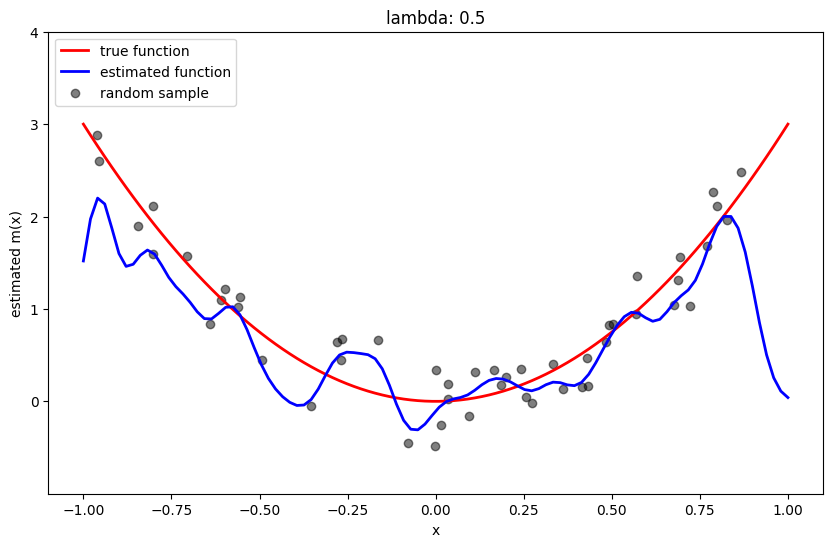

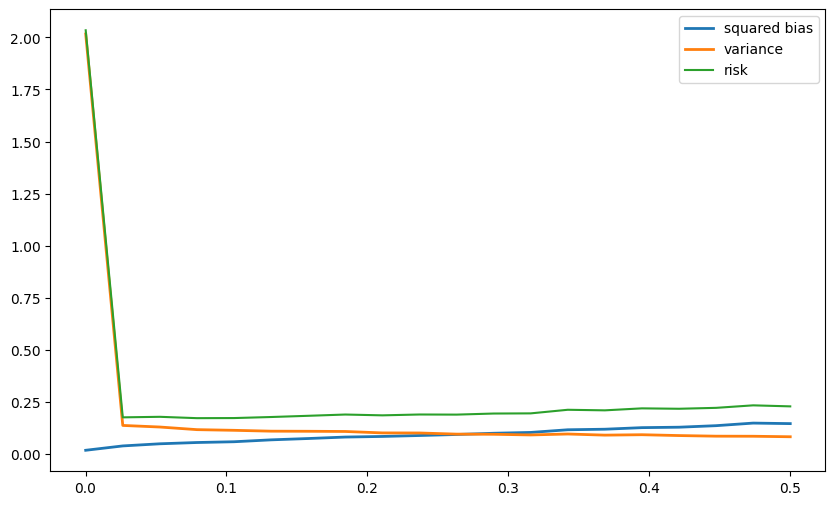

Optimal lambda = 0.07903157894736842


In [13]:
lmbdas = np.linspace(0.0001, 0.5, 20)
run_simulation(kernel1, lmbdas)

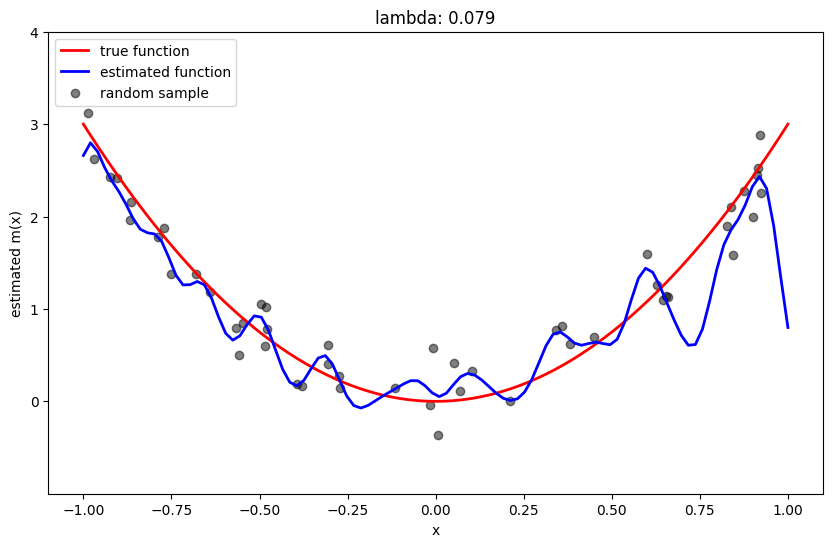

In [14]:
lambda_hat = 0.07903157894736842
run_simulation(kernel1, [lambda_hat], show_bias_variance=False)

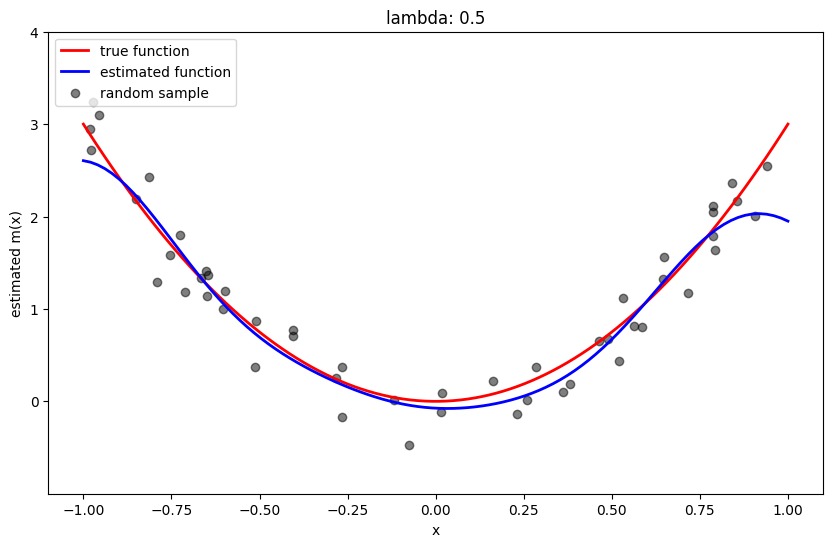

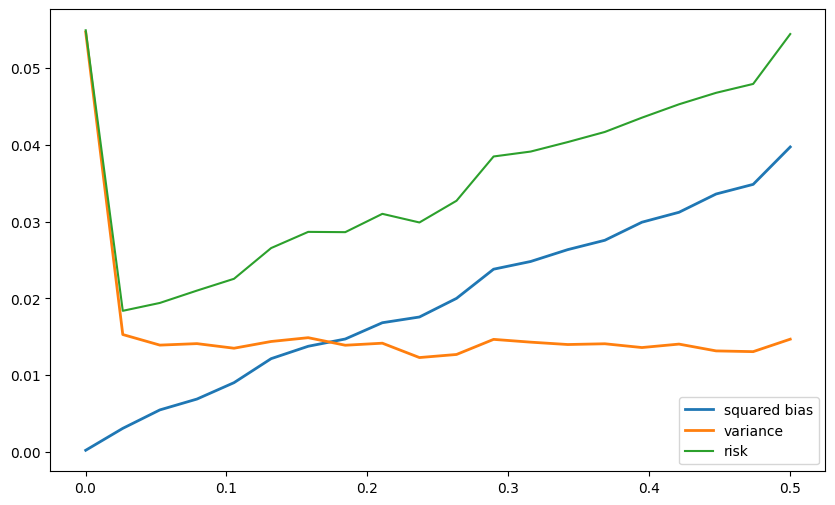

Optimal lambda = 0.026410526315789475


In [15]:
lmbdas = np.linspace(0.0001, 0.5, 20)
run_simulation(kernel2, lmbdas)

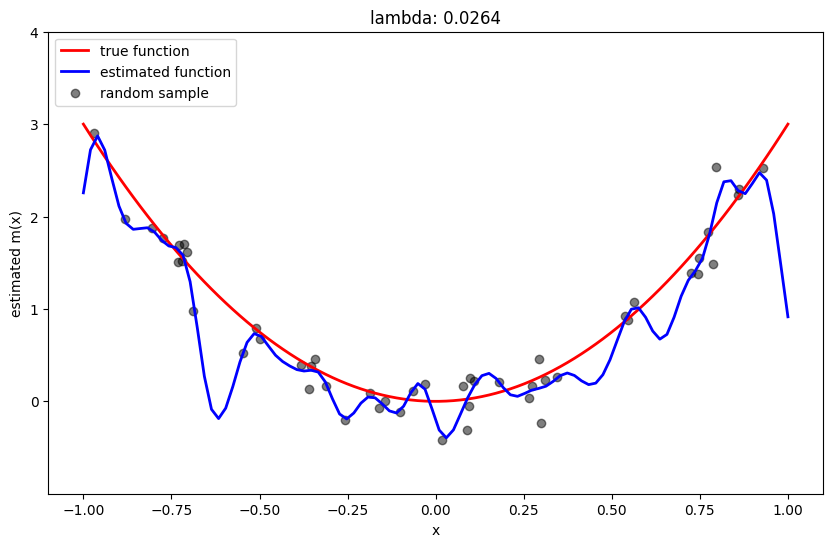

In [16]:
lambda_hat = 0.026410526315789475
run_simulation(kernel1, [lambda_hat], show_bias_variance=False)

### Problem 4: An algebraic simplification of LOOCV (15 points)

Leave-One-Out Cross Validation (LOOCV) is a specific type of
$K$-fold cross validation where $K$ equals the number of observations in the dataset.
It works as follows for a training set with $n$ observations:

1. A single observation is used as the validation set,
    and the remaining $n-1$ observations serve as the training set.
2. A model is trained on the $n-1$ observations and
    validated on the single left-out observation.
3. This process is repeated $n$ times, each time leaving out a different
    observation as the validation set.
4. The LOOCV error is then the average error across all $n$ trials.

LOOCV is particularly useful because:
- It utilizes almost all the data for training,
    so it's less prone to high variance compared to other validation schemes.
- Since each observation is tested exactly once,
    LOOCV provides a very thorough out-of-sample testing mechanism.

However, it can be computationally expensive because you have to fit the model $n$ times.
    Luckily, for some models, there are algebraic simplifications available
    that make it computationally efficient.
    Expressing LOOCV in terms of the hat matrix allows for efficient
    computation of the LOOCV error without the need to refit the model for
    each left-out observation, making it a valuable tool for model evaluation.

Recall that the LOOCV error can be expressed as:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_{-i} \right)^2, $$

where $\hat{y}_{-i}$ represents the prediction for the $i^{th}$ observation
when it's left out from the training process.
In the following questions, you will be deriving an alternative expression
of the LOOCV error for both kernel and ridge regression, following the hints below.

### 1. LOOCV for kernel smoothing:

For kernels, we know that the LOOCV error can be equivalently written as the following form:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i - \hat y_i}{1 - L_{ii}} \right)^2, $$
where $\hat y_i$ is the predicted value from the model fit on all data, and
$L_{ii}$ is the $i^{th}$ diagonal element of the hat matrix $L$.

For kernel regression, we have
$$ \hat{y} = L y, $$
where
- $ \hat{y} $ is the vector of predictions.
- $ y $ is the observed response values.
- $ L $ is the hat matrix and is defined by the kernel (for a given bandwidth).
So, each diagonal element $ L_{ii} $ of the matrix $ L $ is defined as:
$$ L_{ii} = \frac{K\left(x_i, x_i\right)}{\sum_{j=1}^{n} K\left(x_i, x_j\right)}, $$
where
- $ K $ is the kernel function.
- $ x_i $ and $ x_j $ are the predictor values for observations $ i $ and $ j $, respectively.

The diagonal elements $ L_{ii} $ give the "leverage" of each observation, which can be interpreted as the influence an observation has on its own prediction.

Derive this alternative expression of the LOOCV error for kernel regression. That's to say, for kernel regression, prove that

$$ y_i - \hat{y}_{-i}  =  \frac{y_i - \hat y_i}{1 - L_{ii}}$$

In [17]:
# Your markdown here.

## Problem 5: LASSO and Elastic Net

In class, we derived the solution for the one-dimensional LASSO using convexity and subgradients. We also know that coordinate descent can be used to solve LASSO in the high-dimensional case. Sometimes, we introduce a penalty that is a mixture of the $\ell_1$ and $\ell_2$ norms,  

$$
\lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|_2^2,
$$  

which is referred to as the **Elastic Net**. This problem demonstrates how the Elastic Net can be computed using the LASSO.

Let us first recall the one-dimensional LASSO objective:

$$
f(\beta) = \frac{a}{2}\beta^2 - b\beta + \lambda |\beta|,
\qquad a > 0,\; \lambda \ge 0.
$$

The minimizer is given by

$$
\widehat{\beta} = \frac{\operatorname{sign}(b)\,\big(|b| - \lambda\big)_+}{a},
$$

where $(x)_+ = \max\{x,0\}$.

5.1 Solve the one-dimensional LASSO problem

$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n}\sum_{i=1}^n (y_i - \beta x_i)^2 + \lambda |\beta| \right\},
$$

where $\lambda \geq 0$ and at least one $x_i \neq 0$.

In [18]:
# Your markdown here.

5.2 Solve the one-dimensional Elastic Net
$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n} \sum_{i=1}^n (y_i - \beta x_i)^2 + \lambda_1 |\beta| + \lambda_2 \beta^2 \right\},
$$

where $\lambda_1 \geq 0$, $\lambda_2 \geq 0$, and at least one $x_i \neq 0$.  

*Hint:* Convert this problem into the form of 5.1. What happens if we observe a new data point $(\sqrt{2n\lambda_2}, 0)$?

In [19]:
# Your markdown here.

5.3 Now consider the case where we have data $\mathbf{Y} \in \mathbb{R}^n$ and $\mathbf{X} \in \mathbb{R}^{n \times p}$. We want to find an estimator

$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n}\| \mathbf{Y} - \mathbf{X}\beta\|_2^2 + \lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|_2^2 \right\}.
$$

Assume we have access to an oracle that can solve the LASSO. How can we use it to solve the Elastic Net?  

*Hint:* Construct augmented variables $\mathbf{Y}^*$ and $\mathbf{X}^*$
(not necessarily the same shapes as $\mathbf{Y}$ and $\mathbf{X}$) and show that the objective is equivalent to
$$
\frac{1}{2\,\mathrm{len}(\mathbf{Y}^*)}
\|\mathbf{Y}^* - \mathbf{X}^*\beta\|_2^2
+ \lambda_1 \|\beta\|_1.
$$

In [20]:
# Your markdown here.

5.4 Now revisit the diabetes dataset from the first problem. Apply the result you derived, together with the `Lasso` implementation from `sklearn.linear_model`, to solve the elastic net. Specifically, we want to solve

$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n}\|\mathbf{Y} - \mathbf{X}\beta\|_2^2
+ \lambda_1 \|\beta\|_1
+ \lambda_2 \|\beta\|_2^2 \right\},
$$
where $\lambda_1 = \lambda_2 = 0.1$.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
%matplotlib inline
X, y = load_diabetes(return_X_y=True)
X = np.hstack([np.ones((X.shape[0], 1)), X])
n, p = X.shape
n, p = X.shape

lambda1,lambda2 = 0.1, 0.1
# y_star = your code here
y_star = np.sqrt((n+p)/n) * np.concatenate([y, np.zeros(p)])
# X_star = your code here
X_star = np.sqrt((n+p)/n) * np.concatenate([X, np.sqrt(2*n*lambda2)*np.eye(p)])
model = Lasso(alpha=lambda1, fit_intercept=False)
model.fit(X_star, y_star)
your_coef = model.coef_

# You can use the following code to verify your answer
from sklearn.linear_model import ElasticNet
lambda1, lambda2 = 0.1, 0.1
alpha = lambda1 + 2 * lambda2
l1_ratio = lambda1 / (lambda1 + 2 * lambda2)

# Fit ElasticNet with your X, y
model = ElasticNet(alpha=alpha,
                   l1_ratio=l1_ratio,
                   fit_intercept=False,
                   max_iter=10000,
                   tol=1e-6,
                   selection='cyclic')

model.fit(X, y)
elastic_coef = model.coef_
print(np.linalg.norm(your_coef - elastic_coef)/np.linalg.norm(elastic_coef))  # should be a very small number

2.473299603353304e-07


5.5 Which values of $\lambda_1$ and $\lambda_2$ are appropriate? A common approach is to use cross-validation. For simplicity, split the data once into training and validation sets, fit the model with different $(\lambda_1,\lambda_2)$, and compare the mean squared error (MSE) on the validation set.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
scalerX, scalery = StandardScaler(), StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)
y_train = scalery.fit_transform(y_train.reshape(-1,1)).ravel()
y_test = scalery.transform(y_test.reshape(-1,1)).ravel()
grid = np.linspace(0.001, 1.0, 30)
params = []
mses = []
for lambda1 in grid:
    for lambda2 in grid:
        # fit a elastic net with lambda1 and lambda2 on (X_train, y_train)
        n_train, p_train = X_train.shape
        X_star_train = np.sqrt((n_train+p_train)/n_train) * np.concatenate([X_train, np.sqrt(2*n_train*lambda2)*np.eye(p_train)])
        y_star_train = np.sqrt((n_train+p_train)/n_train) * np.concatenate([y_train, np.zeros(p_train)])
        elastic_net = Lasso(alpha=lambda1, fit_intercept=False)
        elastic_net.fit(X_star_train, y_star_train)
        # compute the mse on (X_test, y_test)
        y_test_pred = elastic_net.predict(X_test)
        mse = np.mean((y_test - y_test_pred)**2)
        # you should use Lasso from sklearn. don't use ElasticNet.
        params.append((lambda1, lambda2))
        mses.append(mse)
your_lambda1,your_lambda2 = params[np.argmin(mses)]

#You can verify your answer using the following code
params2 = []
mses2 = []


In [23]:
for lambda1 in grid:
    for lambda2 in grid:
        alpha = lambda1 + 2 * lambda2
        l1_ratio = lambda1 / (lambda1 + 2 * lambda2)
        model = ElasticNet(alpha=alpha,
                   l1_ratio=l1_ratio,
                   fit_intercept=False,
                   max_iter=10000,
                   tol=1e-6,
                   selection='cyclic')
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        params2.append((lambda1, lambda2))
        mses2.append(mse)
select_lambda1,select_lambda2 = params2[np.argmin(mses2)]

print(your_lambda1 == select_lambda1 and your_lambda2 == select_lambda2)   # should be True

True
